          IWDA  IWDA - 0.45%  CGD Líderes Globais  IWDA Cum  IWDA - 0.45% Cum  \
Year                                                                            
2013  1.088067      1.083567                1.018  1.088067          1.083567   
2014  1.204100      1.199600                1.136  1.310141          1.299847   
2015  1.107377      1.102877                1.084  1.450820          1.433570   
2016  1.104454      1.099954                1.119  1.602364          1.576862   
2017  1.074946      1.070446                1.081  1.722455          1.687946   
2018  0.958389      0.953889                0.970  1.650782          1.610113   
2019  1.295843      1.291343                1.282  2.139154          2.079208   
2020  1.062021      1.057521                1.079  2.271826          2.198806   
2021  1.325390      1.320890                1.307  3.011056          2.904381   
2022  0.864586      0.860086                0.854  2.603317          2.498017   

      CGD Líderes Globais C

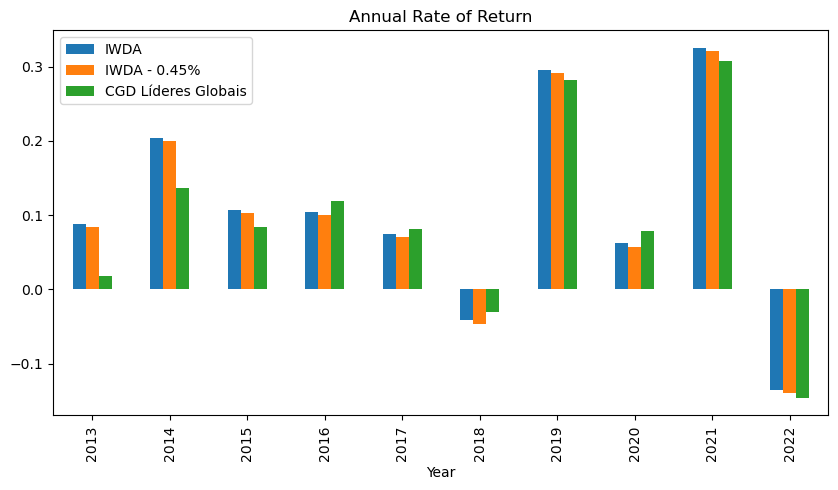

In [1]:
import pandas as pd

iwda = pd.read_csv('data/IWDA.AS.csv', index_col='Date', parse_dates=True, usecols=['Adj Close', 'Date'])

iwda['Year'] = iwda.index.year
iwda['Return'] = iwda['Adj Close'].pct_change()
iwda['Return'] = iwda['Return'].fillna(0)
iwda['Return'] = iwda['Return'] + 1
iwda['Return'] = iwda['Return'].cumprod()

iwda_annual_return = iwda.groupby('Year')['Return'].last().pct_change()

# Calculate 2013 return manually, from August 30th to December 31st, because that's when CGD's PPR started
iwda_annual_return[2013] = (iwda.loc['2013-12-31']['Adj Close'] / iwda.loc['2013-08-30']['Adj Close']) - 1

cgd = pd.read_csv('data/cgd-lideres-globais.csv', index_col='Year', usecols=['Year', 'Annual Growth Rate'])

df = pd.merge(iwda_annual_return, cgd, left_index=True, right_index=True)
df = df.rename(columns={'Return': 'IWDA', 'Annual Growth Rate': 'CGD Líderes Globais'})

df.insert(1, 'IWDA - 0.45%', df['IWDA'] - 0.0045)

df.plot(kind='bar', figsize=(10, 5), title='Annual Rate of Return')

for col in df.columns:
    df[col] = df[col] + 1
    df[col + ' Cum'] = df[col].cumprod()

print(df)